In [1]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [2]:
##Import the requred libraries

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot
from  sklearn.metrics import  mean_squared_error
import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
import seaborn as sns


In [3]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [4]:
# # #Import csv file to colab
# from google.colab import files
# uploaded = files.upload()

**bold text**# 1. Read the data as an appropriate Time Series data and plot the data.


# 1. Read the data as an appropriate Time Series data and plot the data.


## Method 1:

In [5]:
df_1 = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)

# index_col -> can be used to force pandas to use the first column as the index

# squeeze : bool -> To notify Pandas that you're using a TS object and NOT a dataframe

# parse_dates : boolean (True) -> try parsing the index. 

In [6]:
df_1.head()

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

In [7]:
df_1.tail()

YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64

In [8]:
print(df_1.dtype)
print(df_1.shape)

int64
(187,)


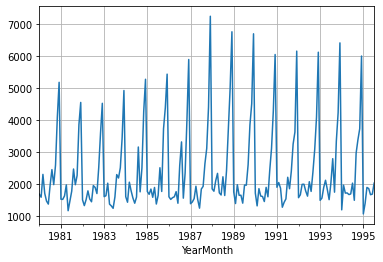

In [9]:
df_1.plot();
plt.grid()

## Method 2:

In [10]:
df_2 = pd.read_csv("Sparkling.csv")

In [11]:
df_2.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


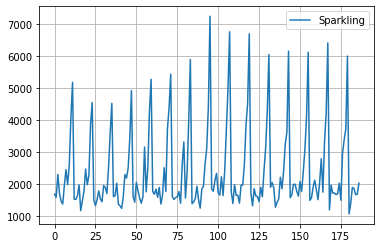

In [13]:
df_2.plot();
plt.grid()

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

In [14]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

The time stamps (in the above code snippet) is defined as a monthly Time Series after looking at the data. Please refer to the following documentation of the 'date_range' functionality in Pandas from $\href{https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html}{here}$.

In [15]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [16]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

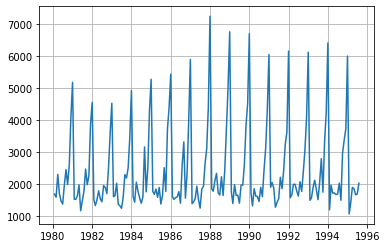

In [17]:
plt.plot(df_2['Time_Stamp'],df_2['Sparkling']);
plt.grid()

## Method 3:

In [18]:
df_3 = pd.read_csv("Sparkling.csv")

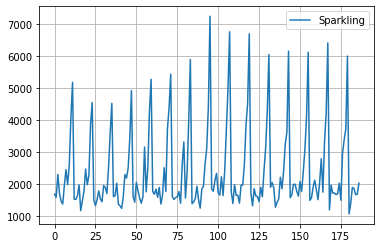

In [19]:
df_3.plot();
plt.grid()

In [20]:
from datetime import datetime

In [21]:
df_3['YearMonth'] = pd.to_datetime(df_3['YearMonth'], infer_datetime_format = True)

In [22]:
df_3.head()

YearMonth  Sparkling
0 1980-01-01       1686
1 1980-02-01       1591
2 1980-03-01       2304
3 1980-04-01       1712
4 1980-05-01       1471

In [23]:
indexed_df = df_3.set_index(['YearMonth'])

In [24]:
indexed_df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

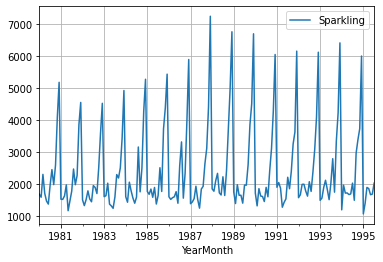

In [25]:
indexed_df.plot();
plt.grid()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [26]:
df_1.describe()

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

In [27]:
quarterly=df_1.resample('Q').sum()
quarterly.head()

YearMonth
1980-03-31     5581
1980-06-30     4560
1980-09-30     6403
1980-12-31    11862
1981-03-31     4686
Freq: Q-DEC, Name: Sparkling, dtype: int64

## Plot a year on year boxplot for the Wine production.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



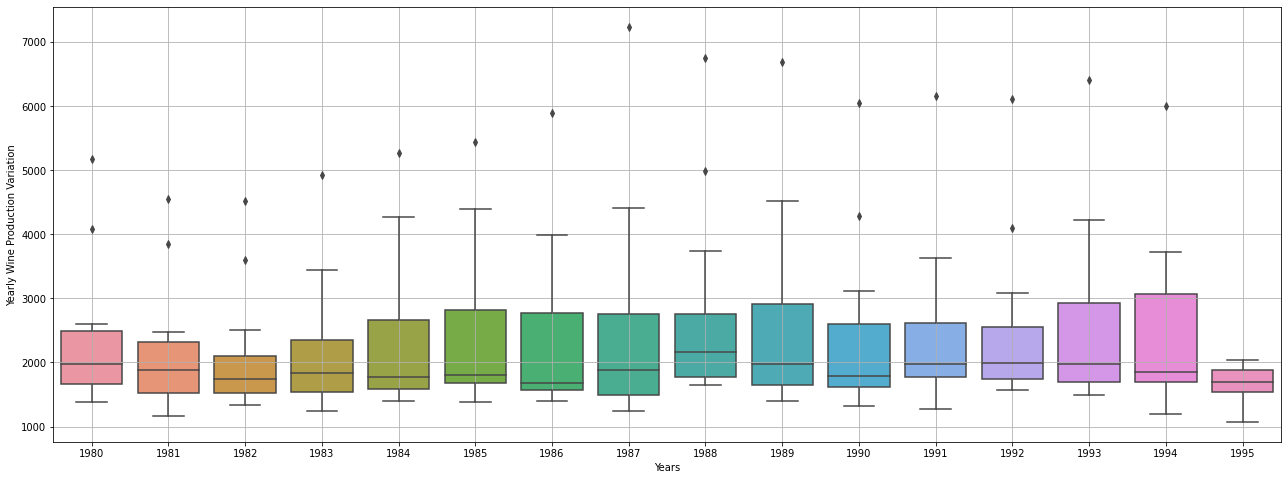

In [28]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

## Plot a monthly boxplot for the Wine production taking all the years into account

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



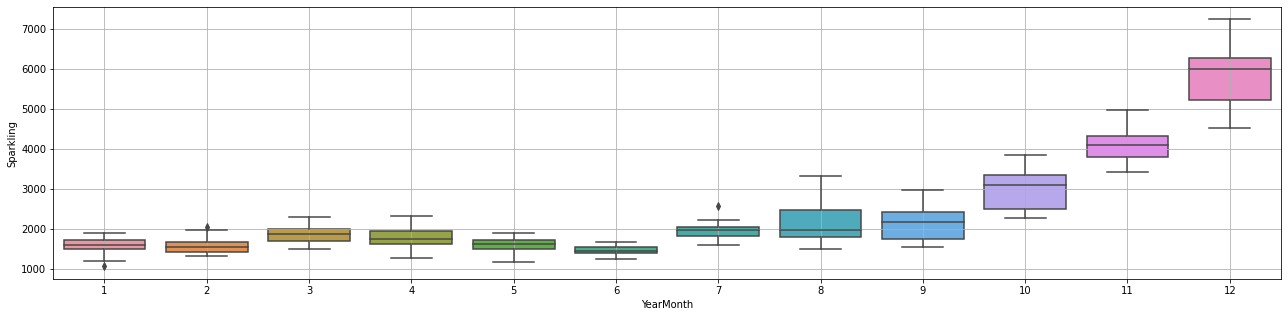

In [29]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();

## Plot a monthplot of the give Time Series.

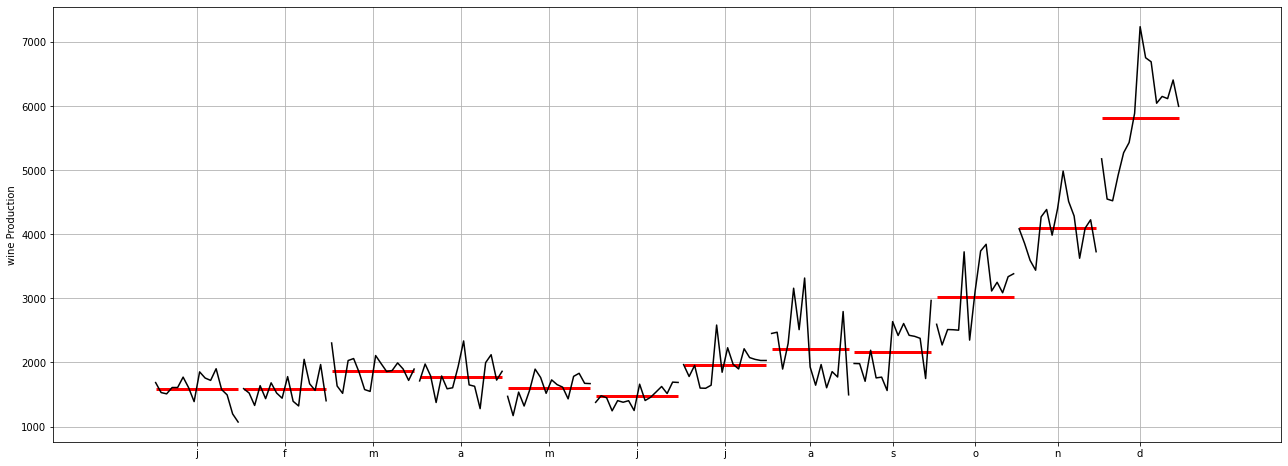

In [30]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='wine Production',ax=ax)
plt.grid();

## Plot the Time Series according to different months for different years.

In [31]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [32]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [33]:
df_2['Sparkling']

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
              ... 
1995-03-31    1897
1995-04-30    1862
1995-05-31    1670
1995-06-30    1688
1995-07-31    2031
Name: Sparkling, Length: 187, dtype: int64

In [34]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Sparkling', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp      1       2       3       4   ...      9       10      11      12
Time_Stamp                                  ...                                
1980        1686.0  1591.0  2304.0  1712.0  ...  1984.0  2596.0  4087.0  5179.0
1981        1530.0  1523.0  1633.0  1976.0  ...  1981.0  2273.0  3857.0  4551.0
1982        1510.0  1329.0  1518.0  1790.0  ...  1706.0  2514.0  3593.0  4524.0
1983        1609.0  1638.0  2030.0  1375.0  ...  2191.0  2511.0  3440.0  4923.0
1984        1609.0  1435.0  2061.0  1789.0  ...  1759.0  2504.0  4273.0  5274.0
1985        1771.0  1682.0  1846.0  1589.0  ...  1771.0  3727.0  4388.0  5434.0
1986        1606.0  1523.0  1577.0  1605.0  ...  1562.0  2349.0  3987.0  5891.0
1987        1389.0  1442.0  1548.0  1935.0  ...  2638.0  3114.0  4405.0  7242.0
1988        1853.0  1779.0  2108.0  2336.0  ...  2421.0  3740.0  4988.0  6757.0
1989        1757.0  1394.0  1982.0  1650.0  ...  2608.0  3845.0  4514.0  6694.0
1990        1720.0  1321.0  1859.0  1628.0  ...  2424.0  3116.0  4286.0  6047.0
1991        1902.0  2049.0  1874.0  1279.0  ...  2408.0  3252.0  3627.0  6153.0
1992        1577.0  1667.0  1993.0  1997.0  ...  2377.0  3088.0  4096.0  6119.0
1993        1494.0  1564.0  1898.0  2121.0  ...  1749.0  3339.0  4227.0  6410.0
1994        1197.0  1968.0  1720.0  1725.0  ...  2968.0  3385.0  3729.0  5999.0
1995        1070.0  1402.0  1897.0  1862.0  ...     NaN     NaN     NaN     NaN

[16 rows x 12 columns]

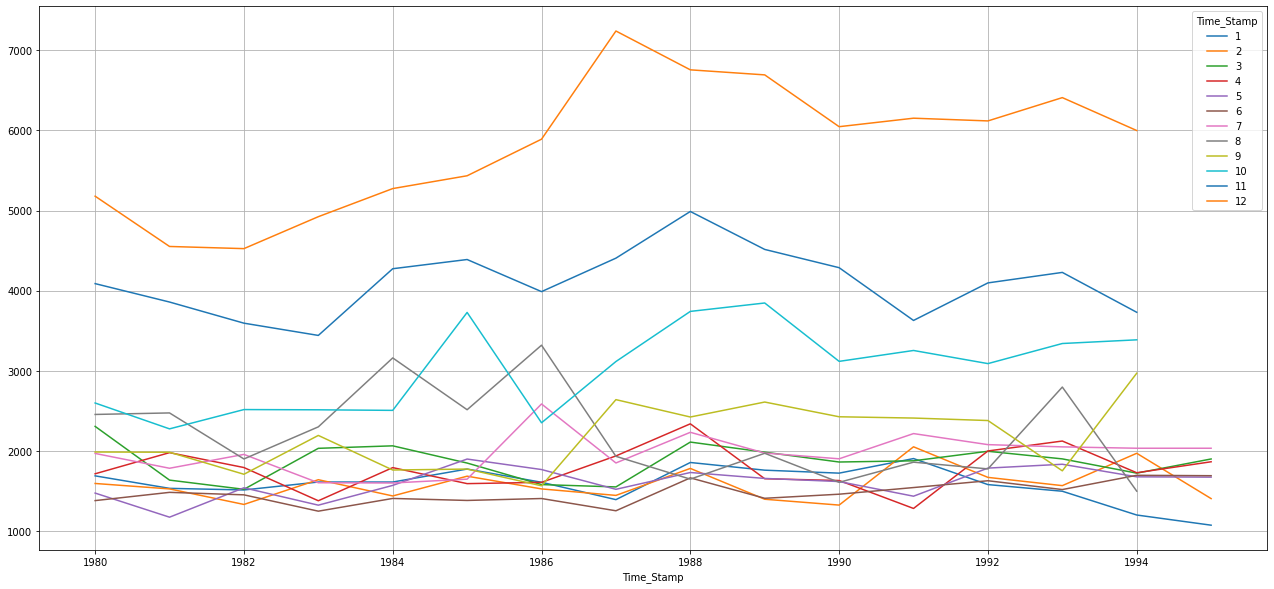

In [35]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

## Reading the monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.




```
# This is formatted as code
```

#### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [36]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    28406
1981-12-31    26227
1982-12-31    25321
1983-12-31    26180
1984-12-31    28431
Freq: A-DEC, Name: Sparkling, dtype: int64

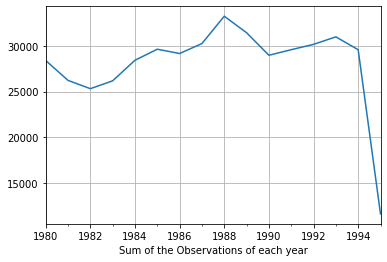

In [37]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [38]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    2367.166667
1981-12-31    2185.583333
1982-12-31    2110.083333
1983-12-31    2181.666667
1984-12-31    2369.250000
Freq: A-DEC, Name: Sparkling, dtype: float64

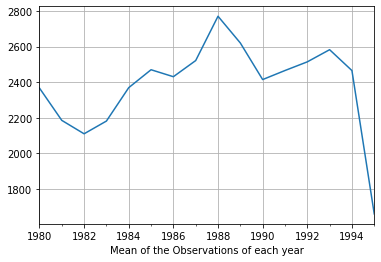

In [39]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

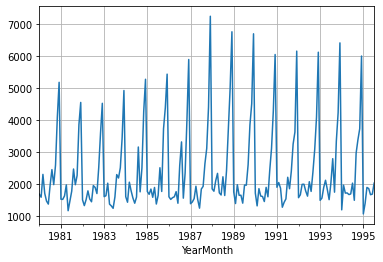

In [40]:
df_1.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

#### Quarterly Plot

In [41]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31     5581
1980-06-30     4560
1980-09-30     6403
1980-12-31    11862
1981-03-31     4686
Freq: Q-DEC, Name: Sparkling, dtype: int64

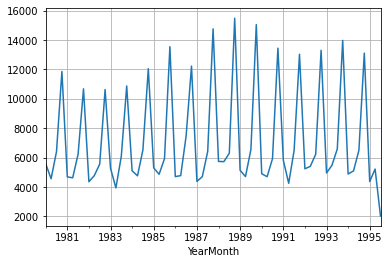

In [42]:
df_quarterly_sum.plot();
plt.grid()

In [43]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31    1860.333333
1980-06-30    1520.000000
1980-09-30    2134.333333
1980-12-31    3954.000000
1981-03-31    1562.000000
Freq: Q-DEC, Name: Sparkling, dtype: float64

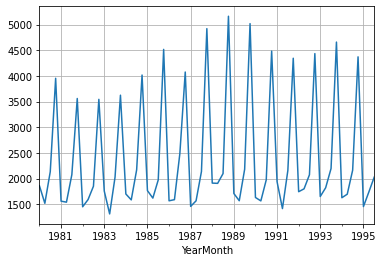

In [44]:
df_quarterly_mean.plot();
plt.grid()

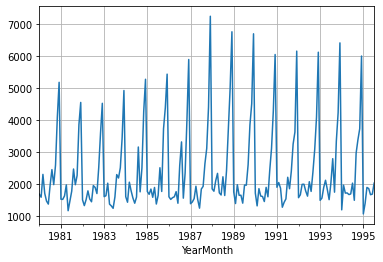

In [45]:
df_1.plot()
plt.grid();

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

#### Decade Plot

In [46]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     28406
1990-12-31    288893
2000-12-31    131953
Freq: 10A-DEC, Name: Sparkling, dtype: int64

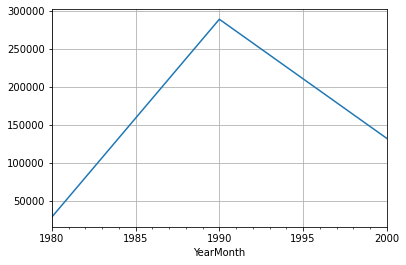

In [47]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

## Decomposition

### Additive Model

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

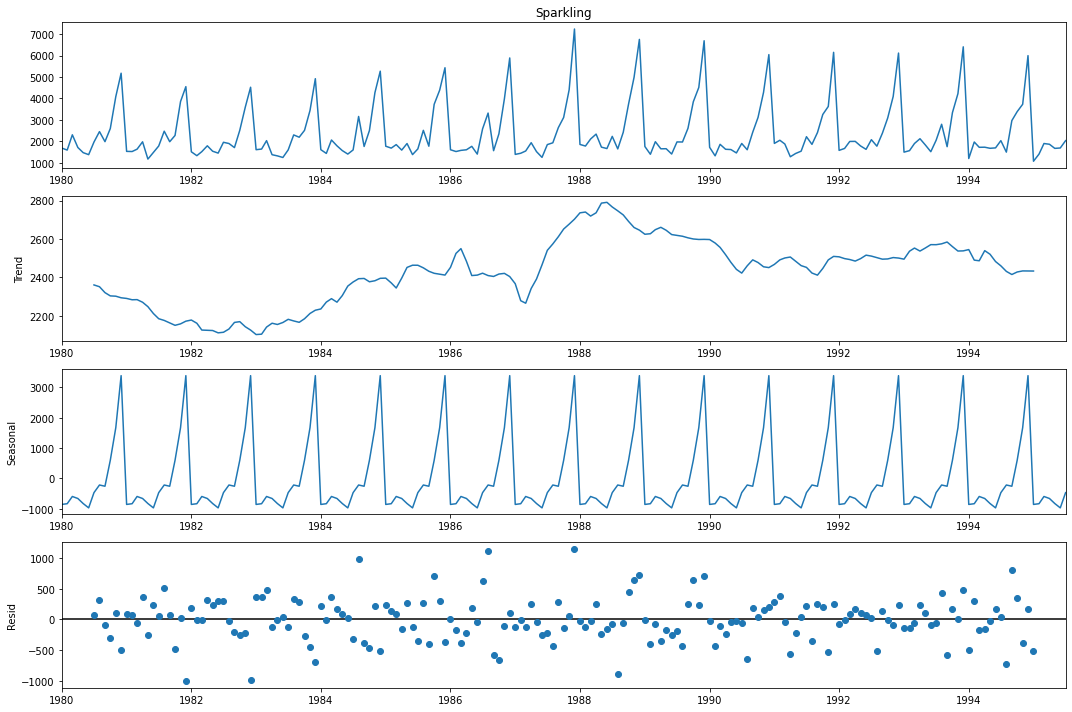

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the mid years of the data. There is a seasonality as well.

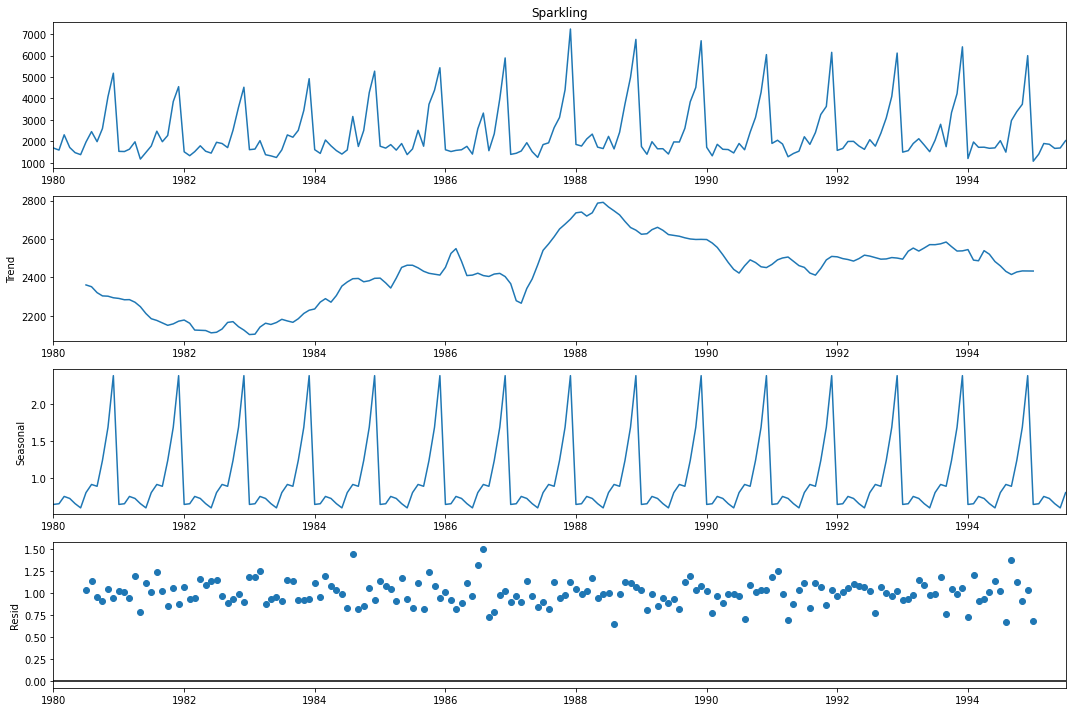

In [50]:
decomposition = seasonal_decompose(df_1,model='multiplicative')
decomposition.plot();

In [51]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [52]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [53]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2361.695896
1980-08-01    2352.468741
1980-09-01    2321.497620
1980-10-01    2304.490847
1980-11-01    2303.092089
1980-12-01    2294.738436
dtype: float64

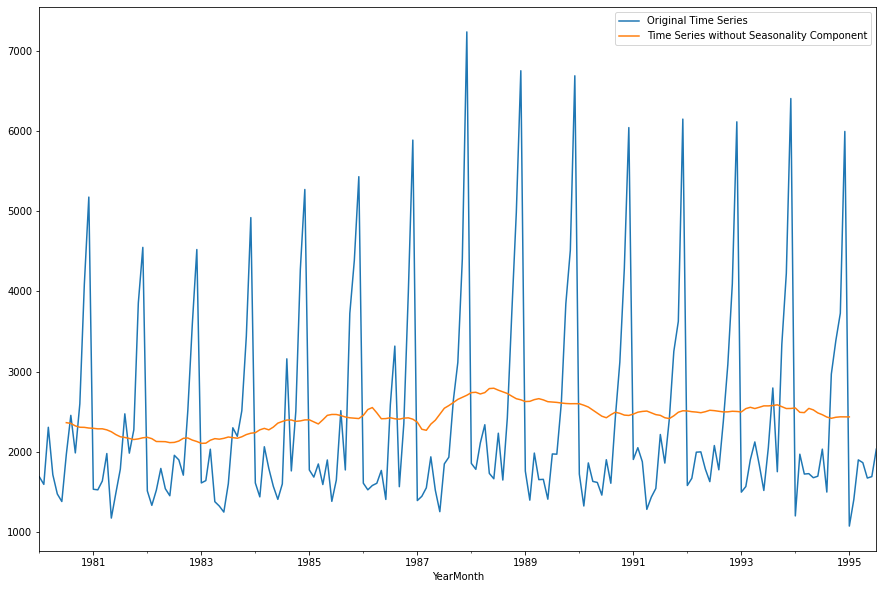

In [54]:
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [55]:
deaseasonalized_ts1 = trend
deaseasonalized_ts1.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64

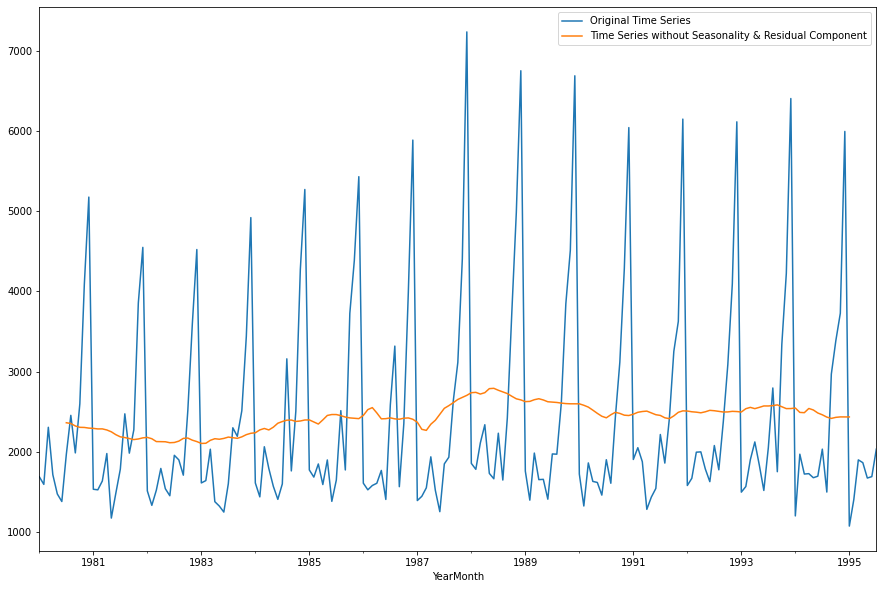

In [56]:
df_1.plot()
deaseasonalized_ts1.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality & Residual Component"]);

# 3. Split the data into training and test. The test data should start in 1991.


In [57]:
train=df_1[df_1.index.year < 1991]
test=df_1[df_1.index.year >= 1991]

In [58]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [59]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

Last few rows of Training Data


YearMonth
1990-08-01    1605
1990-09-01    2424
1990-10-01    3116
1990-11-01    4286
1990-12-01    6047
Name: Sparkling, dtype: int64

First few rows of Test Data


YearMonth
1991-01-01    1902
1991-02-01    2049
1991-03-01    1874
1991-04-01    1279
1991-05-01    1432
Name: Sparkling, dtype: int64

Last few rows of Test Data


YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64

In [60]:
print(train.shape)
print(test.shape)

(132,)
(55,)


# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.


## 1. SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [61]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [62]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [63]:
## Let us check the parameters

model_SES_autofit.params

{'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.07028781460389563,
 'smoothing_seasonal': nan,
 'smoothing_trend': nan,
 'use_boxcox': False}

In [64]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.662714
1991-02-01    2804.662714
1991-03-01    2804.662714
1991-04-01    2804.662714
1991-05-01    2804.662714
1991-06-01    2804.662714
1991-07-01    2804.662714
1991-08-01    2804.662714
1991-09-01    2804.662714
1991-10-01    2804.662714
1991-11-01    2804.662714
1991-12-01    2804.662714
1992-01-01    2804.662714
1992-02-01    2804.662714
1992-03-01    2804.662714
1992-04-01    2804.662714
1992-05-01    2804.662714
1992-06-01    2804.662714
1992-07-01    2804.662714
1992-08-01    2804.662714
1992-09-01    2804.662714
1992-10-01    2804.662714
1992-11-01    2804.662714
1992-12-01    2804.662714
1993-01-01    2804.662714
1993-02-01    2804.662714
1993-03-01    2804.662714
1993-04-01    2804.662714
1993-05-01    2804.662714
1993-06-01    2804.662714
1993-07-01    2804.662714
1993-08-01    2804.662714
1993-09-01    2804.662714
1993-10-01    2804.662714
1993-11-01    2804.662714
1993-12-01    2804.662714
1994-01-01    2804.662714
1994-02-01    2804.662714
1994-03-01  

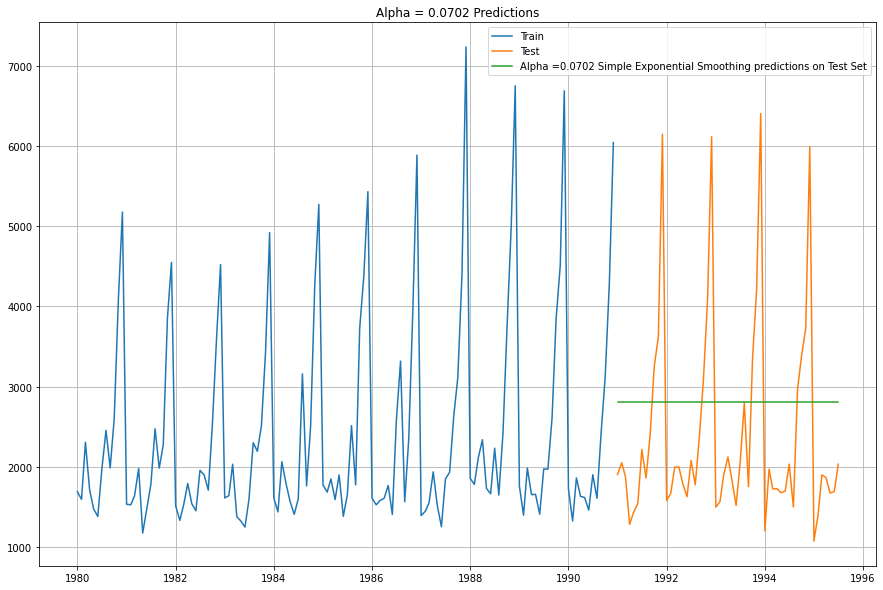

In [65]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.0702 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.0702 Predictions');

In [66]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [67]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values))

SES RMSE: 1338.0046232563645
SES RMSE (calculated using statsmodels): 1338.0046232563645


In [68]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)]},index=['Alpha=0.070,SES'])
resultsDf

Test RMSE
Alpha=0.070,SES  1338.004623

## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing


In [69]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.663876968696767, 'smoothing_trend': 9.966253141484587e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5647740856148, 'initial_trend': 29.0158961579802, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [70]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5330.495531
1991-02-01    5359.509663
1991-03-01    5388.523795
1991-04-01    5417.537927
1991-05-01    5446.552060
1991-06-01    5475.566192
1991-07-01    5504.580324
1991-08-01    5533.594456
1991-09-01    5562.608588
1991-10-01    5591.622721
1991-11-01    5620.636853
1991-12-01    5649.650985
1992-01-01    5678.665117
1992-02-01    5707.679249
1992-03-01    5736.693381
1992-04-01    5765.707514
1992-05-01    5794.721646
1992-06-01    5823.735778
1992-07-01    5852.749910
1992-08-01    5881.764042
1992-09-01    5910.778175
1992-10-01    5939.792307
1992-11-01    5968.806439
1992-12-01    5997.820571
1993-01-01    6026.834703
1993-02-01    6055.848836
1993-03-01    6084.862968
1993-04-01    6113.877100
1993-05-01    6142.891232
1993-06-01    6171.905364
1993-07-01    6200.919496
1993-08-01    6229.933629
1993-09-01    6258.947761
1993-10-01    6287.961893
1993-11-01    6316.976025
1993-12-01    6345.990157
1994-01-01    6375.004290
1994-02-01    6404.018422
1994-03-01  

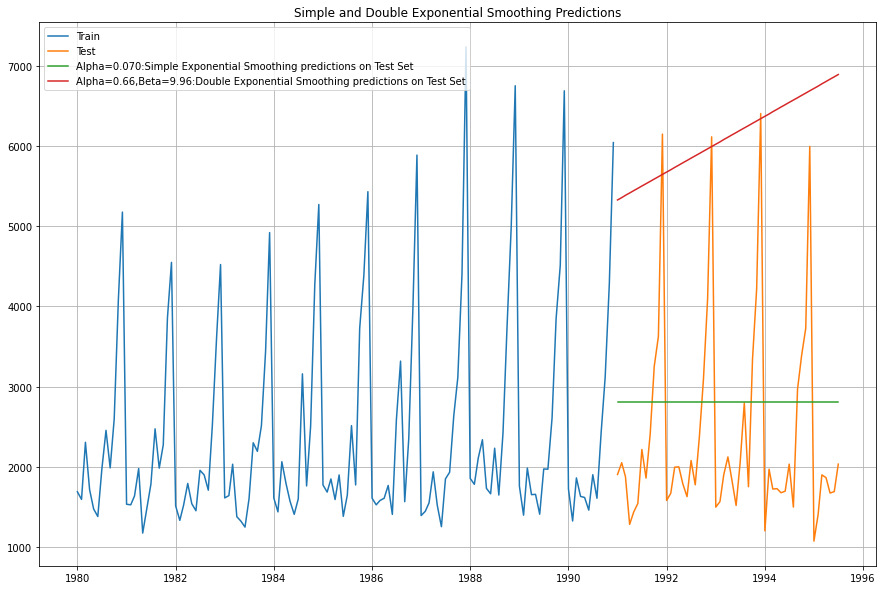

In [71]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=9.96:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [72]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 3949.871656739392


In [73]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.66,Beta=9.96:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.070,SES           1338.004623
Alpha=0.66,Beta=9.96:DES  3949.871657

### Inference

Here, we see that the Double Exponential Smoothing has actually done poor when compared to the Simple Exponential Smoothing. 

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [74]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217802205756, 'smoothing_trend': 0.012360783231808838, 'smoothing_seasonal': 0.4607177648161977, 'damping_trend': nan, 'initial_level': 2356.5782516213985, 'initial_trend': -0.018505484533054783, 'initial_seasons': array([-636.2334923 , -722.98346419, -398.64355452, -473.4307317 ,
       -808.42519856, -815.35019294, -384.23066986,   72.99513696,
       -237.44272897,  272.32590202, 1541.37821002, 2590.07759484]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [75]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1490.574488
1991-02-01    1204.714393
1991-03-01    1688.941181
1991-04-01    1551.450891
1991-05-01    1461.440515
1991-06-01    1278.907257
1991-07-01    1805.164122
1991-08-01    1679.251498
1991-09-01    2315.687762
1991-10-01    3225.309026
1991-11-01    4299.652487
1991-12-01    6411.161494
1992-01-01    1483.296747
1992-02-01    1197.436651
1992-03-01    1681.663439
1992-04-01    1544.173149
1992-05-01    1454.162773
1992-06-01    1271.629515
1992-07-01    1797.886381
1992-08-01    1671.973756
1992-09-01    2308.410020
1992-10-01    3218.031284
1992-11-01    4292.374745
1992-12-01    6403.883752
1993-01-01    1476.019005
1993-02-01    1190.158910
1993-03-01    1674.385697
1993-04-01    1536.895407
1993-05-01    1446.885031
1993-06-01    1264.351773
1993-07-01    1790.608639
1993-08-01    1664.696014
1993-09-01    2301.132278
1993-10-01    3210.753542
1993-11-01    4285.097003
1993-12-01    6396.606011
1994-01-01    1468.741263
1994-02-01    1182.881168
1994-03-01  

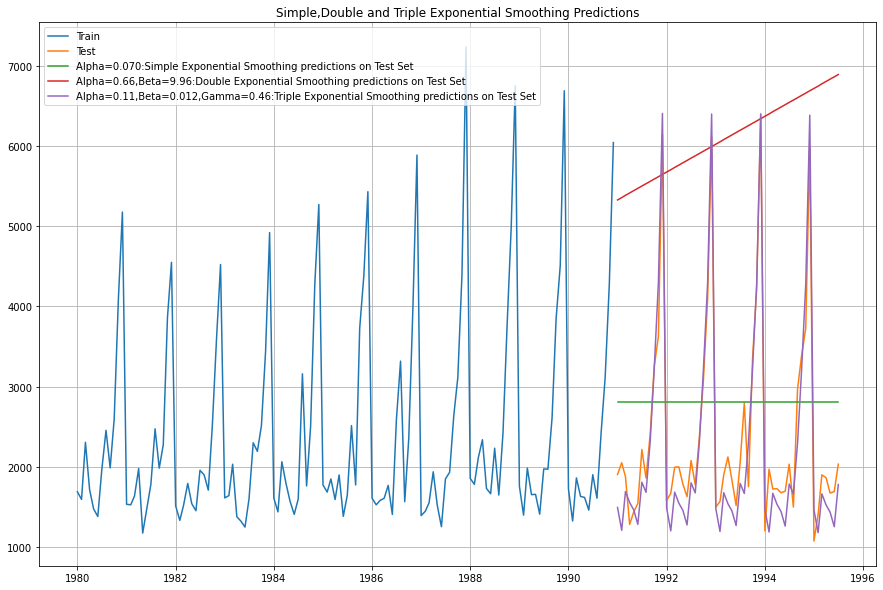

In [76]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=9.96:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.11,Beta=0.012,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [77]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.626124516202


In [78]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.11,Beta=0.012,Gamma=0.46:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.070,SES                       1338.004623
Alpha=0.66,Beta=9.96:DES              3949.871657
Alpha=0.11,Beta=0.012,Gamma=0.46:TES   378.626125

### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

ETS(A, A, M) model

In [79]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11071743658900295, 'smoothing_trend': 0.0491888915880548, 'smoothing_seasonal': 0.3639798336009829, 'damping_trend': nan, 'initial_level': 2355.977406743022, 'initial_trend': -9.785739157534543, 'initial_seasons': array([0.7134207 , 0.6819697 , 0.90102894, 0.80490839, 0.65470294,
       0.65315143, 0.88372605, 1.13031128, 0.91773909, 1.20978508,
       1.86777286, 2.37091079]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [80]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1588.207919
1991-02-01    1356.322412
1991-03-01    1763.518066
1991-04-01    1656.358151
1991-05-01    1542.511925
1991-06-01    1355.691151
1991-07-01    1854.814511
1991-08-01    1819.183477
1991-09-01    2278.628353
1991-10-01    3124.271502
1991-11-01    4131.165736
1991-12-01    5896.516738
1992-01-01    1539.556059
1992-02-01    1314.667608
1992-03-01    1709.218671
1992-04-01    1605.227055
1992-05-01    1494.772407
1992-06-01    1313.625095
1992-07-01    1797.111835
1992-08-01    1762.442170
1992-09-01    2207.371503
1992-10-01    3026.314579
1992-11-01    4001.299818
1992-12-01    5710.668993
1993-01-01    1490.904199
1993-02-01    1273.012803
1993-03-01    1654.919276
1993-04-01    1554.095959
1993-05-01    1447.032890
1993-06-01    1271.559039
1993-07-01    1739.409158
1993-08-01    1705.700863
1993-09-01    2136.114653
1993-10-01    2928.357656
1993-11-01    3871.433899
1993-12-01    5524.821248
1994-01-01    1442.252338
1994-02-01    1231.357999
1994-03-01  

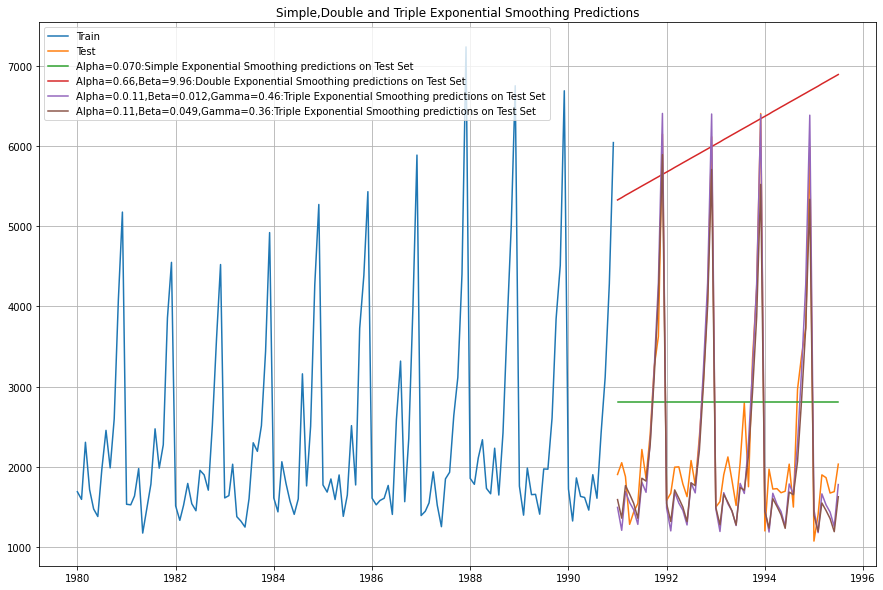

In [81]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=9.96:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0.11,Beta=0.012,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.11,Beta=0.049,Gamma=0.36:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [82]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 402.04922689599823


In [83]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.070,SES                          1338.004623
Alpha=0.66,Beta=9.96:DES                 3949.871657
Alpha=0.11,Beta=0.012,Gamma=0.46:TES      378.626125
Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am   402.049227

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.



## Linear Regression

In [84]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+1183 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237]


In [85]:
LinearRegression_train = train.copy().to_frame()
LinearRegression_test = test.copy().to_frame()

In [86]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902  1183
1991-02-01       2049  1184
1991-03-01       1874  1185
1991-04-01       1279  1186
1991-05-01       1432  1187 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897  1233
1995-04-01       1862  1234
1995-05-01       1670  1235
1995-06-01       1688  1236
1995-07-01       2031  1237 



In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr = LinearRegression()

In [89]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [91]:
# evaluate the model
from sklearn import metrics


In [92]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test.to_frame()['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 6795.088


In [93]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.070,SES                          1338.004623
Alpha=0.66,Beta=9.96:DES                 3949.871657
Alpha=0.11,Beta=0.012,Gamma=0.46:TES      378.626125
Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am   402.049227
RegressionOnTime                         6795.087986

## Naive forecast model

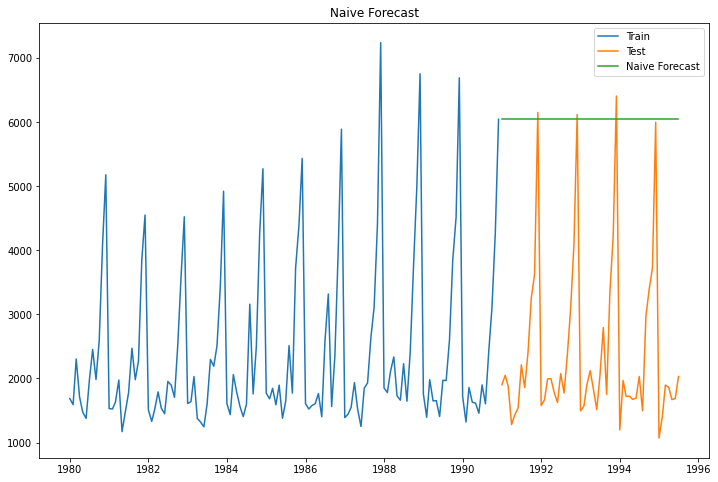

In [94]:
dd= np.asarray(train.to_frame()['Sparkling'])
y_hat = test.to_frame().copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train.to_frame()['Sparkling'], label='Train')
plt.plot(test.index,test.to_frame()['Sparkling'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [95]:

from math import sqrt
rms = sqrt(mean_squared_error(test.to_frame().Sparkling, y_hat.naive))
print(rms)

3864.2793518443914


In [96]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rms]},index=['Naive forecast'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.070,SES                          1338.004623
Alpha=0.66,Beta=9.96:DES                 3949.871657
Alpha=0.11,Beta=0.012,Gamma=0.46:TES      378.626125
Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am   402.049227
RegressionOnTime                         6795.087986
Naive forecast                           3864.279352

## Simple average

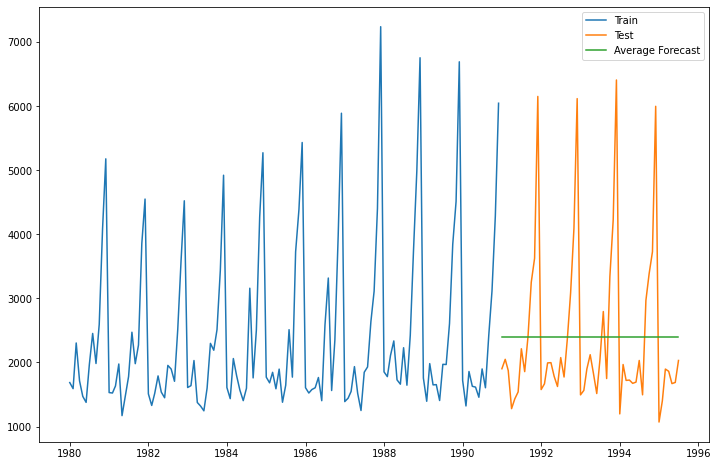

In [97]:
y_hat_avg = test.to_frame().copy()
y_hat_avg['avg_forecast'] = train.to_frame()['Sparkling'].mean()
plt.figure(figsize=(12,8))
plt.plot(train.to_frame()['Sparkling'], label='Train')
plt.plot(test.to_frame()['Sparkling'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [98]:
rms = sqrt(mean_squared_error(test.to_frame().Sparkling, y_hat_avg.avg_forecast))
print(rms)

1275.0818036965309


In [99]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rms]},index=['Simple Avg'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.070,SES                          1338.004623
Alpha=0.66,Beta=9.96:DES                 3949.871657
Alpha=0.11,Beta=0.012,Gamma=0.46:TES      378.626125
Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am   402.049227
RegressionOnTime                         6795.087986
Naive forecast                           3864.279352
Simple Avg                               1275.081804

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.


In [100]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

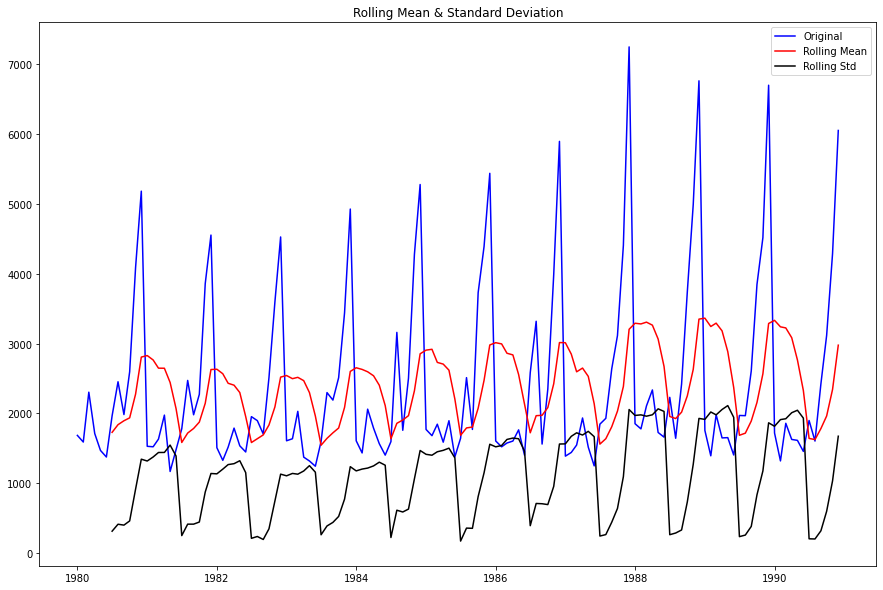

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [101]:
test_stationarity(train.to_frame()['Sparkling'])

we see that the time series is not stationay at  $\alpha$ = 0.05.

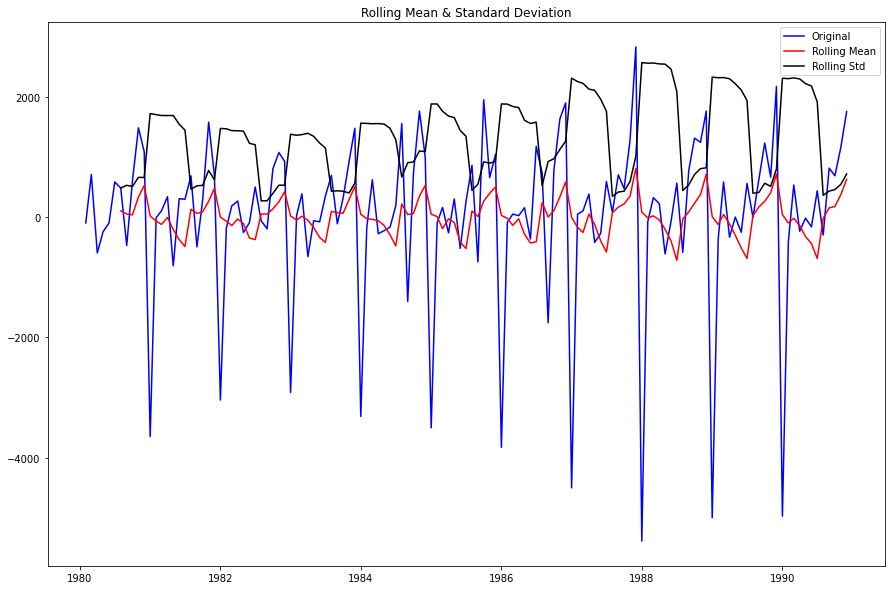

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [102]:
test_stationarity(train.to_frame()['Sparkling'].diff().dropna())

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.


We should build sarima model as the timeseries has seasonality

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

<Figure size 1080x720 with 0 Axes>

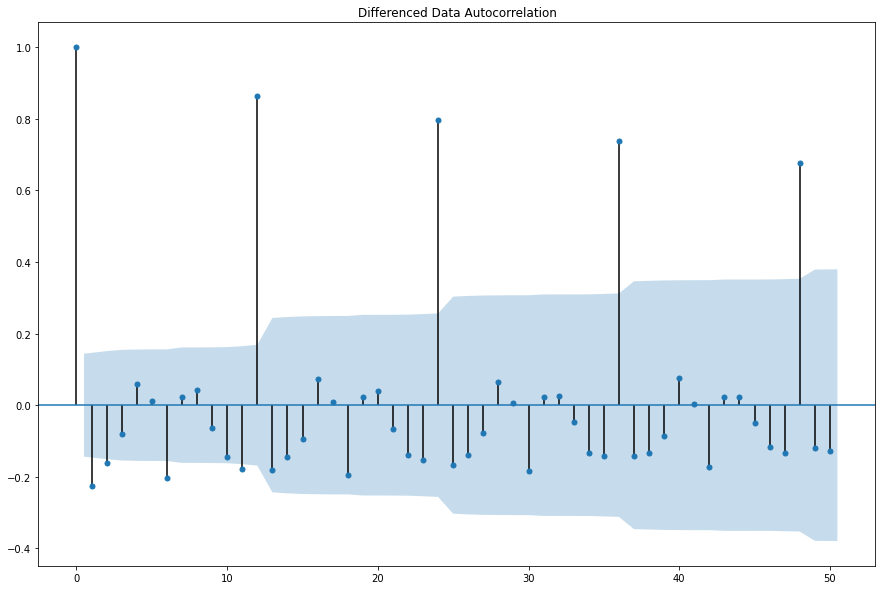

In [103]:
plt.clf()
plot_acf(df_1.to_frame()['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [104]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [105]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [106]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train.to_frame()['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890287
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442614
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360121491463
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510361


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565657
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908283
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339545654
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.57324287805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298135855
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.709327417171
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885105271946
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.771793327305
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.696451065541
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.4410101687263
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.684384021589
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151463717886
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689234754
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.4215581539015
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6938084413007
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.653707904941
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6191005977582
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:172

In [107]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.510410
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888867
17  (0, 1, 1)  (2, 0, 2, 6)  1741.696451
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379777
71  (2, 1, 1)  (2, 0, 2, 6)  1744.040750

In [108]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train.to_frame()['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.755
Date:                           Thu, 25 Mar 2021   AIC                           1727.510
Time:                                   21:33:26   BIC                           1749.539
Sample:                                        0   HQIC                          1736.453
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6456      0.287     -2.251      0.024      -1.208      -0.083
ma.L1         -0.1062      0.251     -0.423

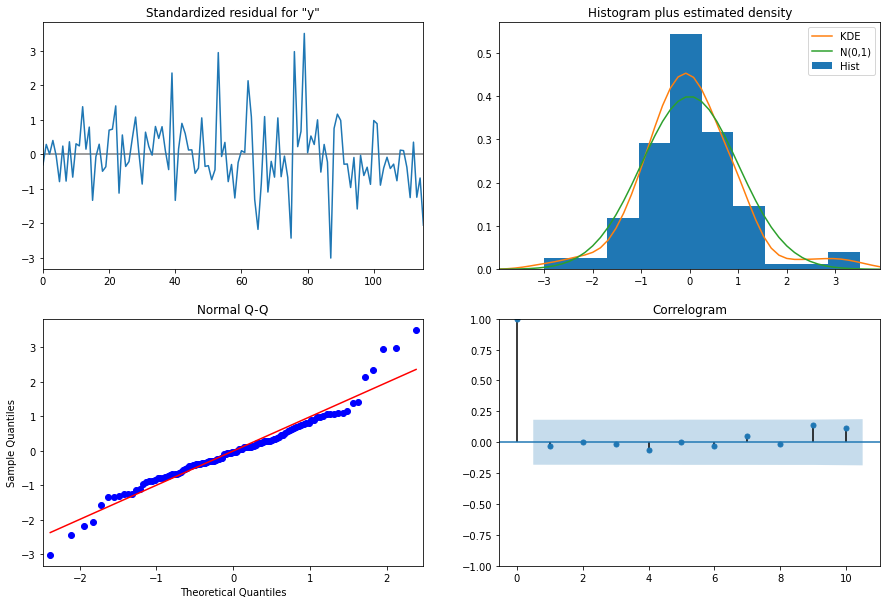

In [109]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

### Predict on the Test Set using this model and evaluate the model.

In [110]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [111]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1329.961174  380.489186     584.216073    2075.706276
1  1177.217844  392.027547     408.857970    1945.577717
2  1624.617648  392.224079     855.872580    2393.362717
3  1544.380555  397.632714     765.034756    2323.726353
4  1306.284245  398.854159     524.544458    2088.024032

In [112]:
auto_Sarima_6_pred=TES_predict_am.copy().to_frame()
#predicted_auto_SARIMA_12.summary_frame(alpha=0.05)['mean']
auto_Sarima_6_pred['Pred']=predicted_auto_SARIMA_6.summary_frame(alpha=0.05)['mean'].values
auto_Sarima_6_pred=auto_Sarima_6_pred.drop([0],axis=1)

In [113]:
rmse = mean_squared_error(test.to_frame()['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

629.3077658179349


In [114]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha=0.070,SES                          1338.004623
Alpha=0.66,Beta=9.96:DES                 3949.871657
Alpha=0.11,Beta=0.012,Gamma=0.46:TES      378.626125
Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am   402.049227
RegressionOnTime                         6795.087986
Naive forecast                           3864.279352
Simple Avg                               1275.081804
SARIMA(1,1,2)(2,0,2,6)                    629.307766

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [115]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [116]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [117]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train.to_frame()['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684482
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239436
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138944
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791433
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158597898
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920817
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566458
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572681343
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838475
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193765953
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319658500345
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177937
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245090164113
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683741507546
SARIMA(0, 1, 

In [118]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934564
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121564
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340405

In [119]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train.to_frame()['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Thu, 25 Mar 2021   AIC                           1555.584
Time:                                    21:34:31   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

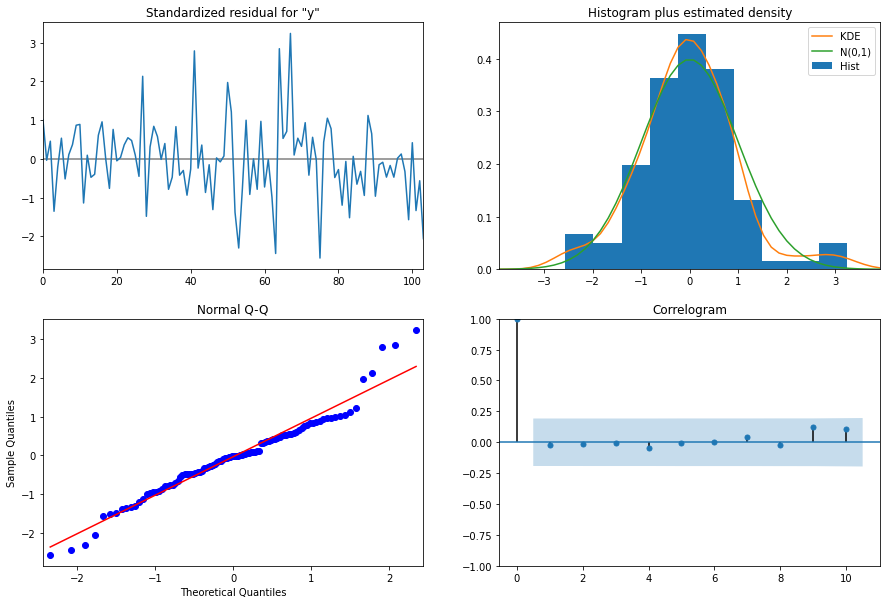

In [120]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

### Predict on the Test Set using this model and evaluate the model.

In [121]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [122]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.381082  388.345023     566.238822    2088.523341
1  1315.106989  402.008235     527.185327    2103.028651
2  1621.584326  402.001841     833.675196    2409.493456
3  1598.863431  407.239665     800.688355    2397.038507
4  1392.683709  407.969774     593.077646    2192.289772

In [123]:
auto_Sarima_12_pred=TES_predict_am.copy().to_frame()
#predicted_auto_SARIMA_12.summary_frame(alpha=0.05)['mean']
auto_Sarima_12_pred['Pred']=predicted_auto_SARIMA_12.summary_frame(alpha=0.05)['mean'].values
auto_Sarima_12_pred=auto_Sarima_12_pred.drop([0],axis=1)

In [124]:
rmse = mean_squared_error(test.to_frame()['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6257351639734


In [125]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha=0.070,SES                          1338.004623
Alpha=0.66,Beta=9.96:DES                 3949.871657
Alpha=0.11,Beta=0.012,Gamma=0.46:TES      378.626125
Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am   402.049227
RegressionOnTime                         6795.087986
Naive forecast                           3864.279352
Simple Avg                               1275.081804
SARIMA(1,1,2)(2,0,2,6)                    629.307766
SARIMA(1,1,2)(1,0,2,12)                   528.625735

We see that the RMSE value have reduced further when the seasonality parameter was changed to 12.

# 7. Build SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

Let us look at the ACF and the PACF plots once more.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



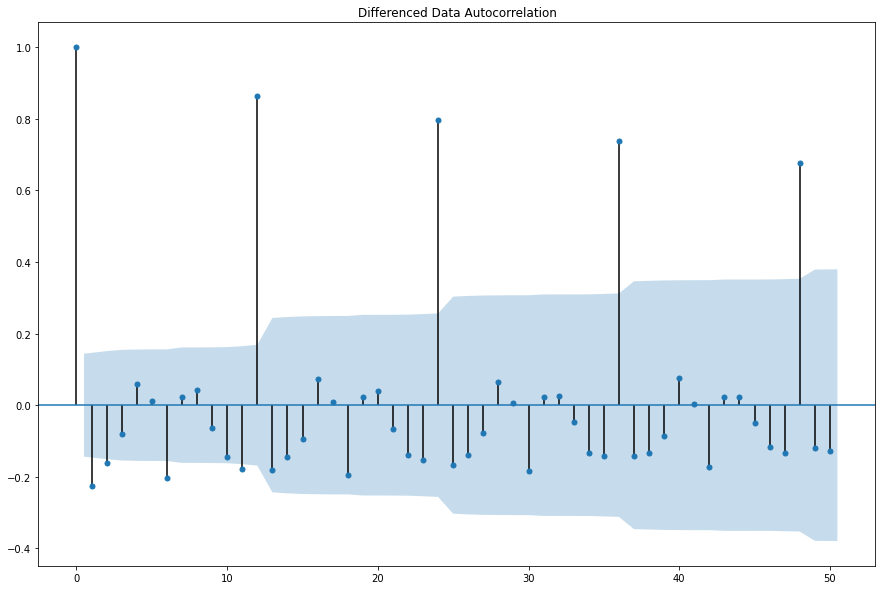

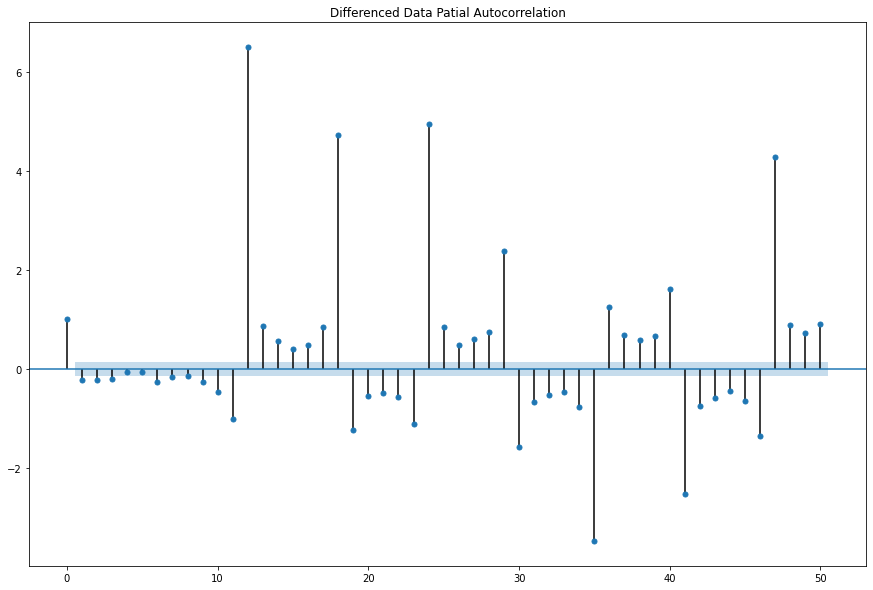

In [126]:
plot_acf(df_1.to_frame()['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1.to_frame()['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper 

---

off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

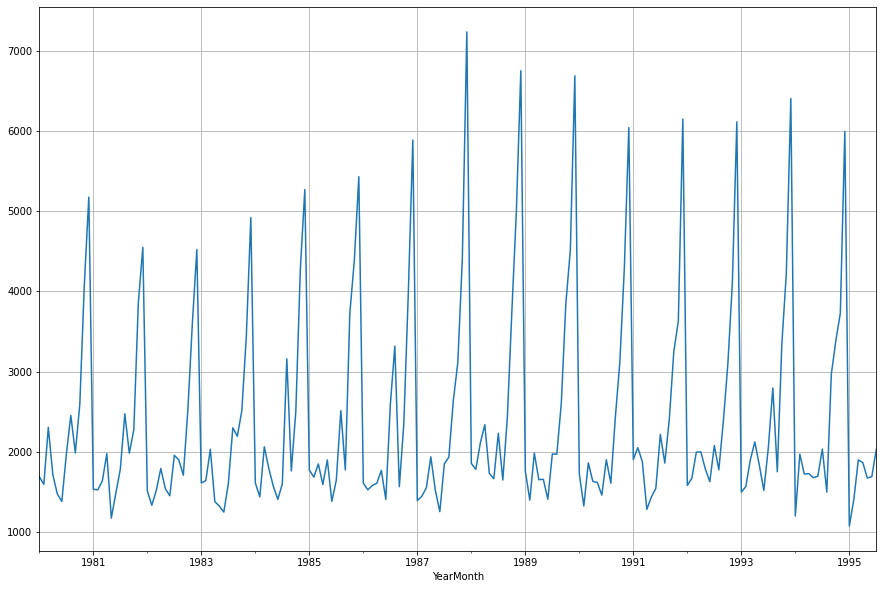

In [127]:
df_1.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

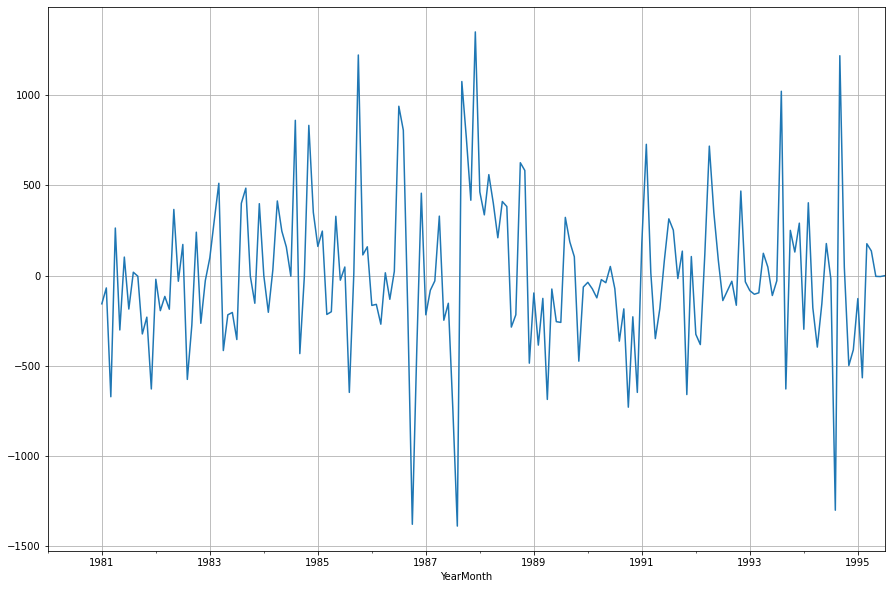

In [128]:
(df_1.to_frame()['Sparkling'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

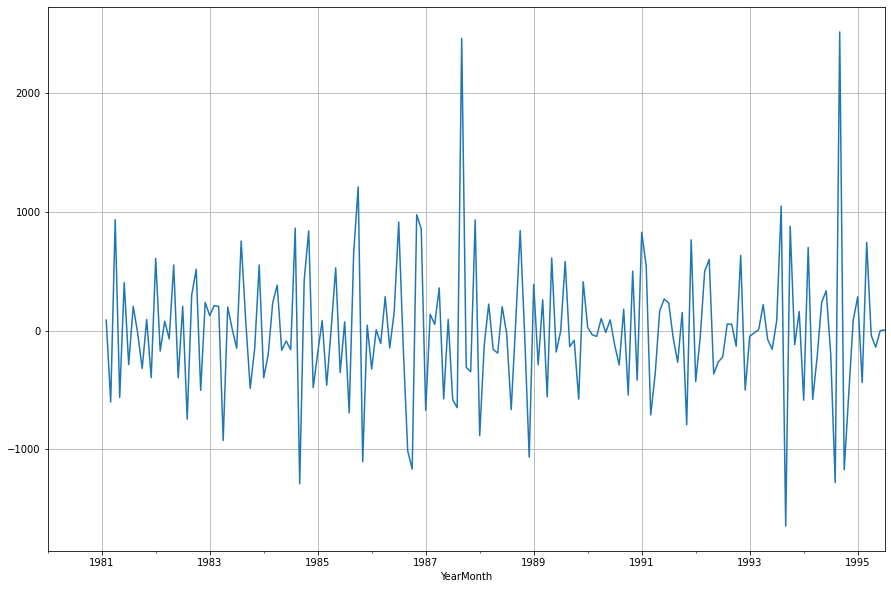

In [129]:
(df_1.to_frame()['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

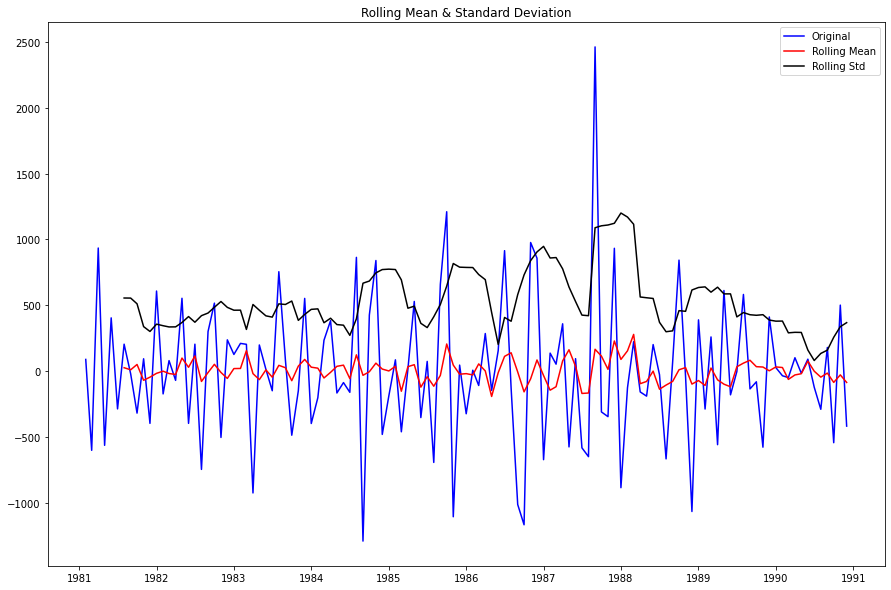

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [130]:
test_stationarity((train.to_frame()['Sparkling'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

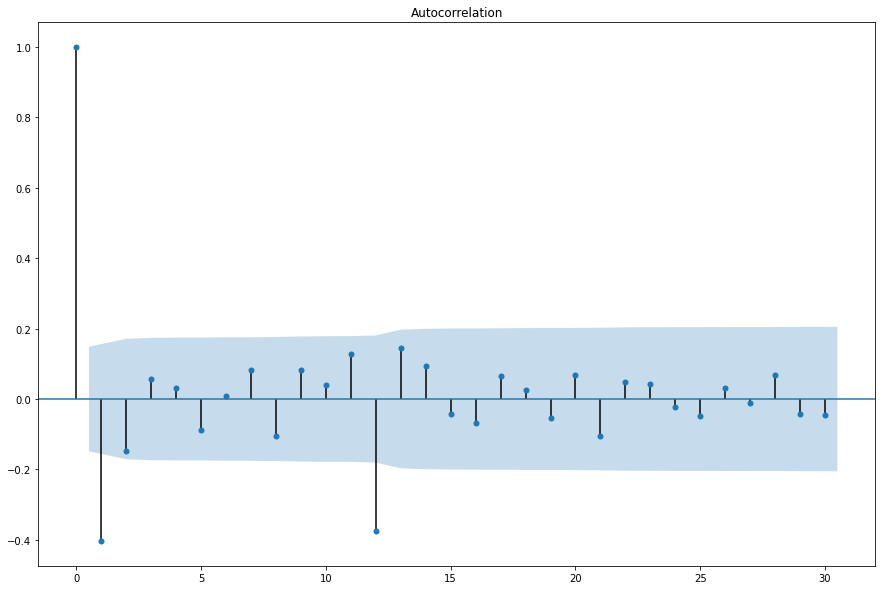

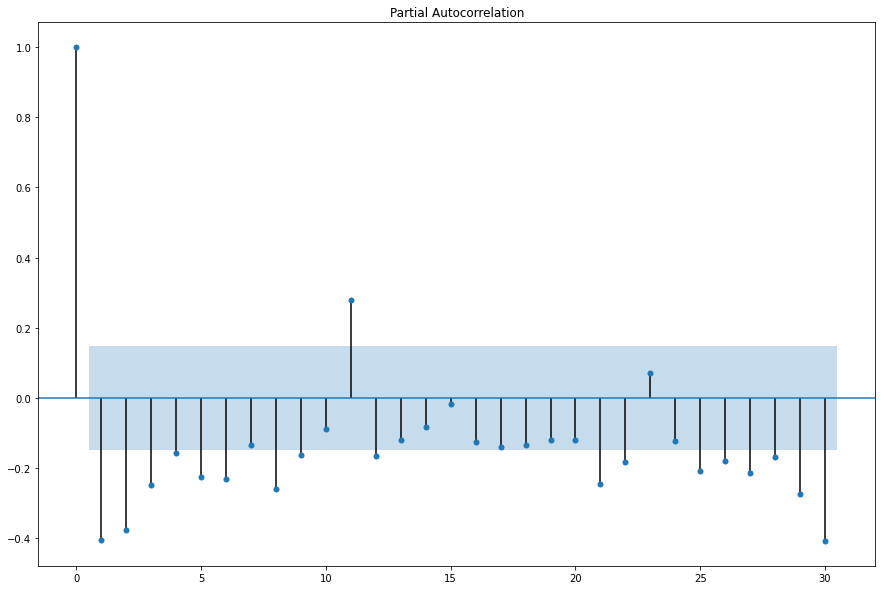

In [159]:
plot_acf((df_1.to_frame()['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_1.to_frame()['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

From the correlogram we get
p=0, d= 1, q=1
P=1, D=1, Q=1
 

In [132]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train.to_frame()['Sparkling'].values,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -781.428
Date:                            Thu, 25 Mar 2021   AIC                           1570.855
Time:                                    21:34:35   BIC                           1581.471
Sample:                                         0   HQIC                          1575.157
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8968      0.052    -17.182      0.000      -0.999      -0.795
ar.S.L12      -0.1022      0.195   

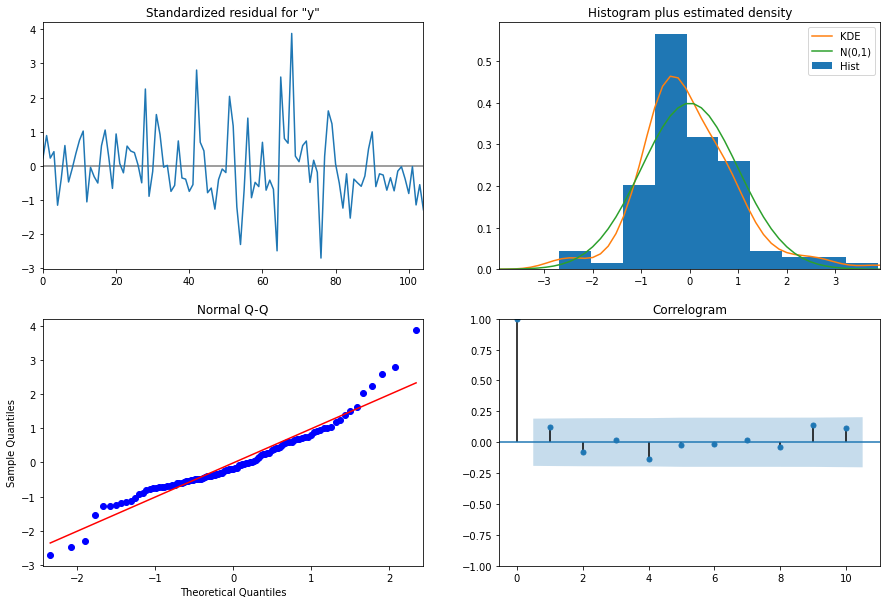

In [133]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [134]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [135]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1553.311966  412.073720     745.662316    2360.961615
1  1235.490176  414.260403     423.554705    2047.425646
2  1730.629938  416.435606     914.431149    2546.828726
3  1558.231739  418.599505     737.791785    2378.671693
4  1464.409960  420.752276     639.750653    2289.069267

In [136]:

Manual_Sarima_12_pred=TES_predict_am.copy().to_frame()
#predicted_auto_SARIMA_12.summary_frame(alpha=0.05)['mean']
Manual_Sarima_12_pred['Pred']=predicted_manual_SARIMA_12.summary_frame(alpha=0.05)['mean'].values
Manual_Sarima_12_pred=Manual_Sarima_12_pred.drop([0],axis=1)

In [137]:
rmse = mean_squared_error(test.to_frame()['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

486.0690313658731


In [138]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_manual(0, 1, 1)(1,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha=0.070,SES                          1338.004623
Alpha=0.66,Beta=9.96:DES                 3949.871657
Alpha=0.11,Beta=0.012,Gamma=0.46:TES      378.626125
Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am   402.049227
RegressionOnTime                         6795.087986
Naive forecast                           3864.279352
Simple Avg                               1275.081804
SARIMA(1,1,2)(2,0,2,6)                    629.307766
SARIMA(1,1,2)(1,0,2,12)                   528.625735
SARIMA_manual(0, 1, 1)(1,1,1,12)          486.069031

This is where our model building exercise ends. 


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



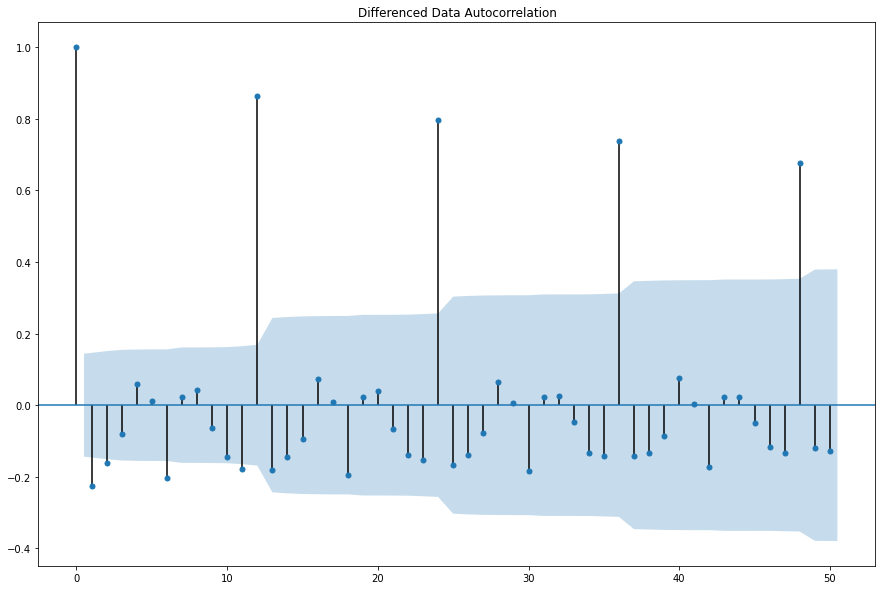

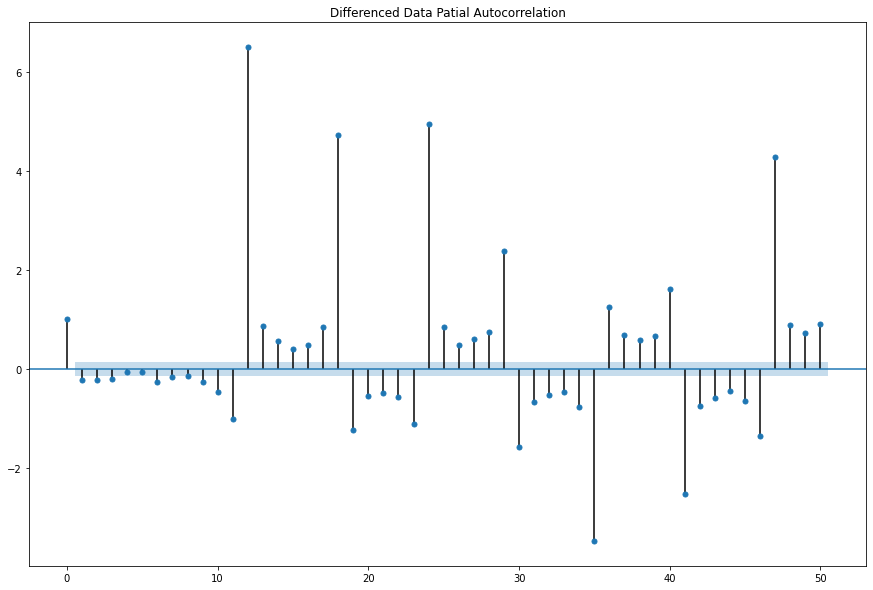

In [139]:
plot_acf(df_1.to_frame()['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1.to_frame()['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper 

---

off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

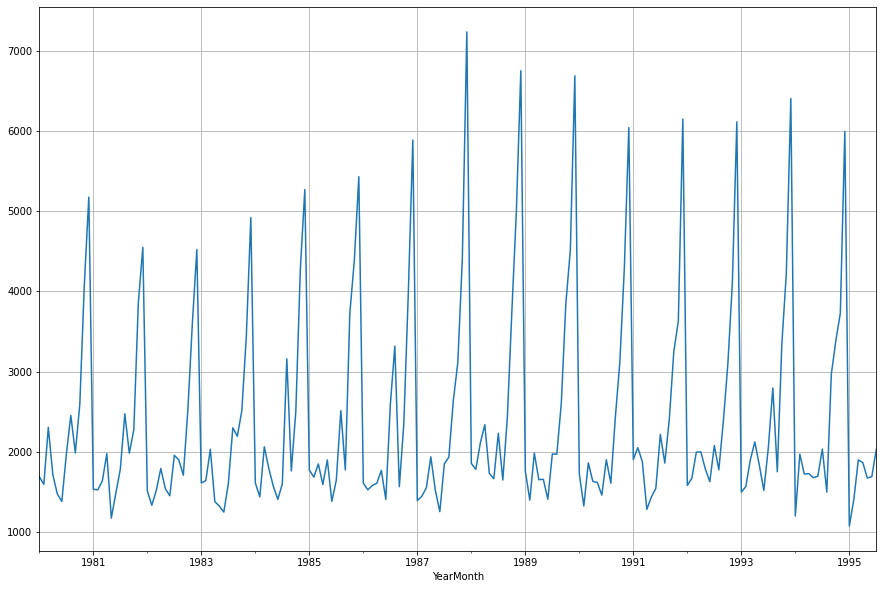

In [140]:
df_1.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

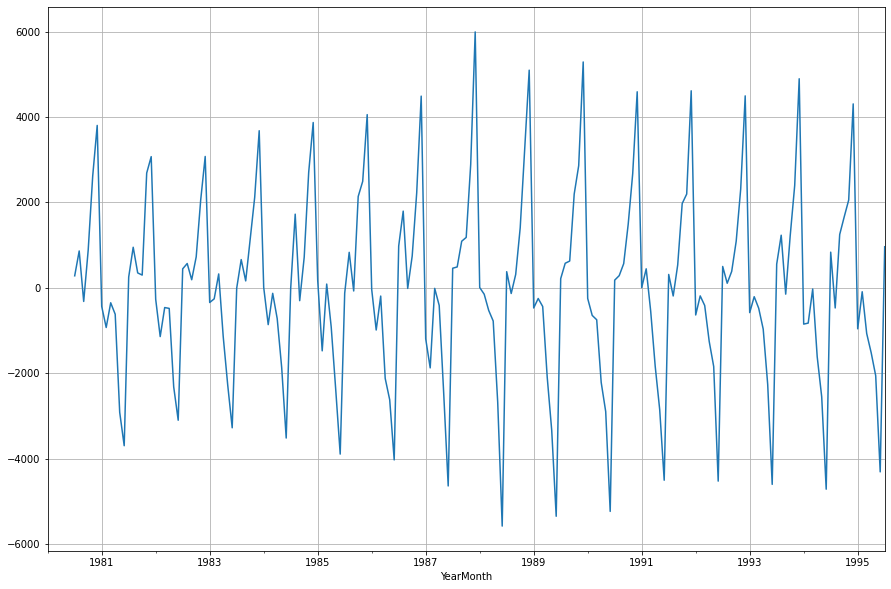

In [141]:
(df_1.to_frame()['Sparkling'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

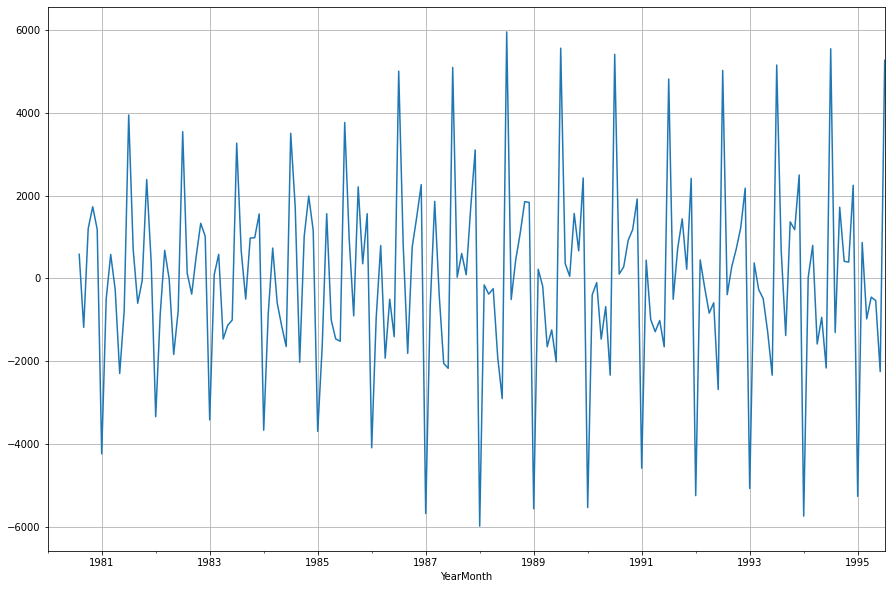

In [142]:
(df_1.to_frame()['Sparkling'].diff(6)).diff(1).plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

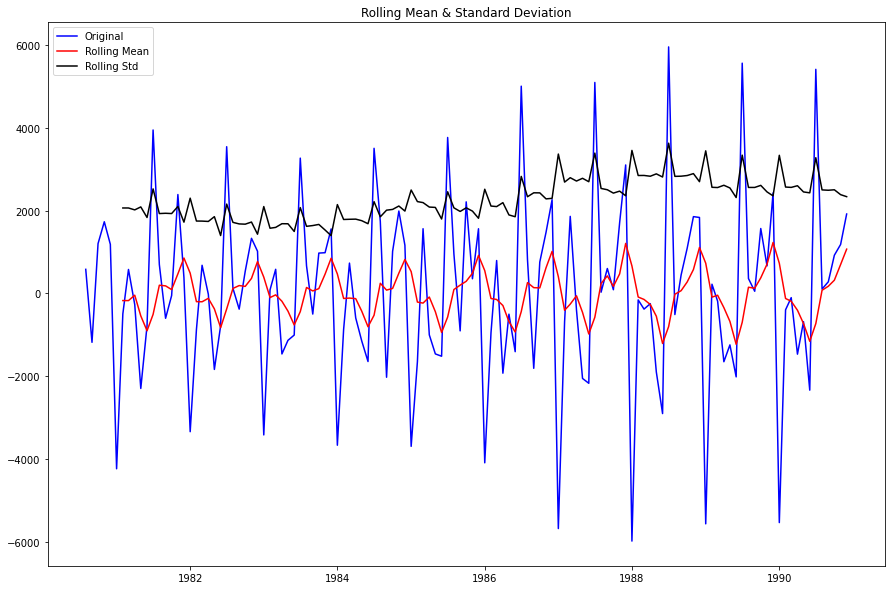

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [143]:
test_stationarity((train.to_frame()['Sparkling'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



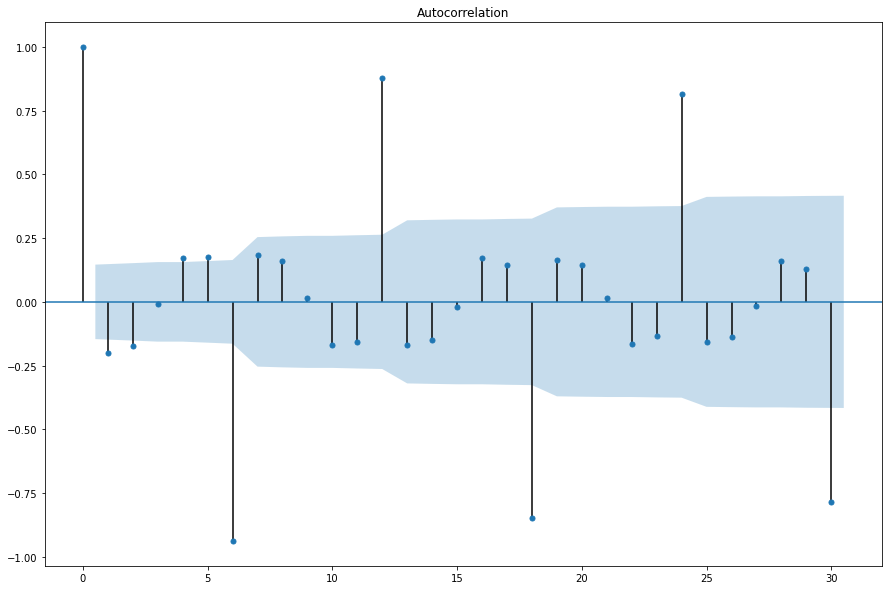

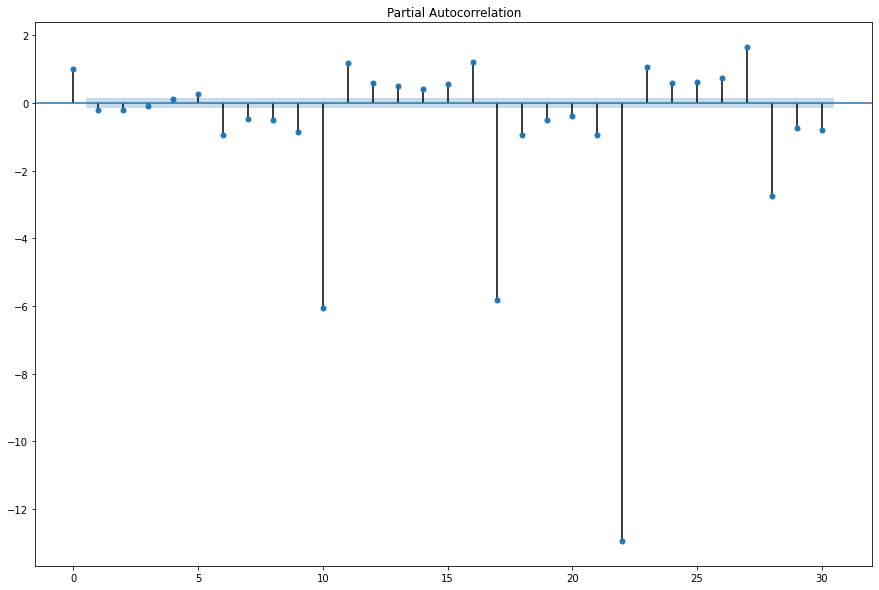

In [144]:
plot_acf((df_1.to_frame()['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_1.to_frame()['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

From the correlogram we get
p=0, d= 1, q=1
P=1, D=1, Q=1


Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [145]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train.to_frame()['Sparkling'].values,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -877.771
Date:                           Thu, 25 Mar 2021   AIC                           1763.543
Time:                                   21:34:39   BIC                           1774.592
Sample:                                        0   HQIC                          1768.028
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1202      0.050    -22.207      0.000      -1.219      -1.021
ar.S.L6       -0.9814      0.020    -49.449

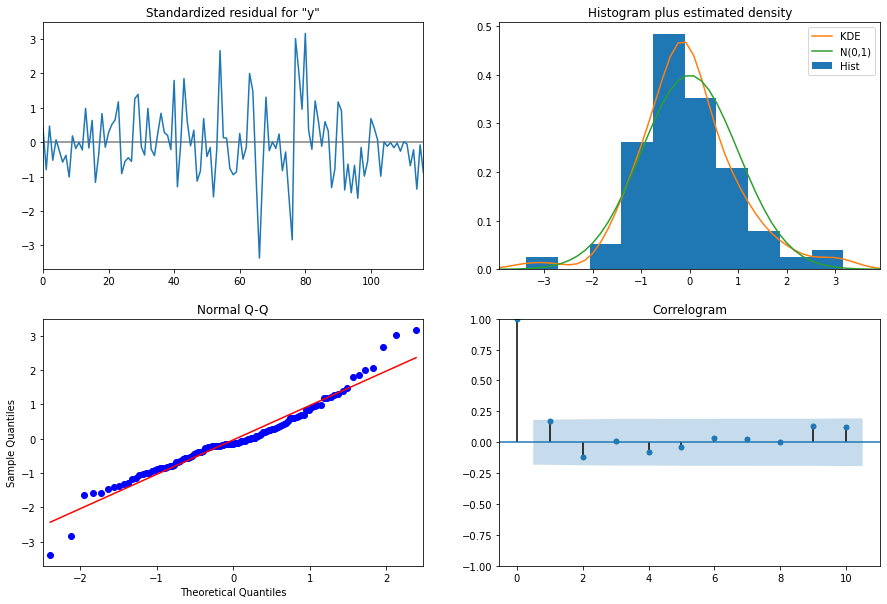

In [146]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [147]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [148]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1525.309200  435.526555     671.692838    2378.925562
1  1173.141187  438.026456     314.625109    2031.657265
2  1688.771099  440.512170     825.383110    2552.159087
3  1557.433036  442.983937     689.200475    2425.665598
4  1485.958130  445.441987     612.907878    2359.008383

In [149]:
Manual_Sarima_6_pred=TES_predict_am.copy().to_frame()
#predicted_auto_SARIMA_12.summary_frame(alpha=0.05)['mean']
Manual_Sarima_6_pred['Pred']=predicted_manual_SARIMA_6.summary_frame(alpha=0.05)['mean'].values
Manual_Sarima_6_pred=Manual_Sarima_6_pred.drop([0],axis=1)

In [150]:
rmse = mean_squared_error(test.to_frame()['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

679.6309446279025


In [151]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_manual(0, 1, 1)(1,1,1,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Test RMSE
Alpha=0.070,SES                          1338.004623
Alpha=0.66,Beta=9.96:DES                 3949.871657
Alpha=0.11,Beta=0.012,Gamma=0.46:TES      378.626125
Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am   402.049227
RegressionOnTime                         6795.087986
Naive forecast                           3864.279352
Simple Avg                               1275.081804
SARIMA(1,1,2)(2,0,2,6)                    629.307766
SARIMA(1,1,2)(1,0,2,12)                   528.625735
SARIMA_manual(0, 1, 1)(1,1,1,12)          486.069031
SARIMA_manual(0, 1, 1)(1,1,1,6)           679.630945

This is where our model building exercise ends. 


# 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [152]:
resultsDf=resultsDf.sort_values("Test RMSE", axis = 0, ascending = True, na_position ='last')

In [153]:
resultsDf

Test RMSE
Alpha=0.11,Beta=0.012,Gamma=0.46:TES      378.626125
Alpha=0.11,Beta=0.049,Gamma=0.36:TES_am   402.049227
SARIMA_manual(0, 1, 1)(1,1,1,12)          486.069031
SARIMA(1,1,2)(1,0,2,12)                   528.625735
SARIMA(1,1,2)(2,0,2,6)                    629.307766
SARIMA_manual(0, 1, 1)(1,1,1,6)           679.630945
Simple Avg                               1275.081804
Alpha=0.070,SES                          1338.004623
Naive forecast                           3864.279352
Alpha=0.66,Beta=9.96:DES                 3949.871657
RegressionOnTime                         6795.087986

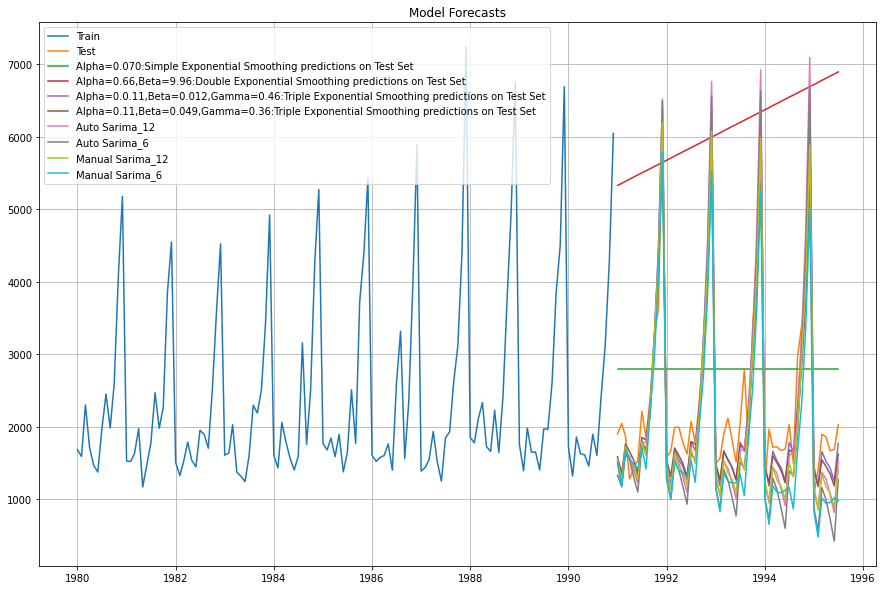

In [154]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=9.96:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0.11,Beta=0.012,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.11,Beta=0.049,Gamma=0.36:Triple Exponential Smoothing predictions on Test Set')
plt.plot(auto_Sarima_12_pred,label='Auto Sarima_12')
plt.plot(auto_Sarima_6_pred,label='Auto Sarima_6')
plt.plot(Manual_Sarima_12_pred,label='Manual Sarima_12')
plt.plot(Manual_Sarima_6_pred,label='Manual Sarima_6')




plt.legend(loc='best')
plt.grid()
plt.title('Model Forecasts');

We see that Triple Exponential Smoothing with Alpha=0.0.11,Beta=0.012,Gamma=0.46 has the best RMSE for the test data

#9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [155]:
TES_predict_12 =  model_TES.forecast(len(test)+12)
future_12_months=TES_predict_12.tail(12)

In [156]:
future_12_months

1995-08-01    1650.140531
1995-09-01    2286.576795
1995-10-01    3196.198059
1995-11-01    4270.541520
1995-12-01    6382.050527
1996-01-01    1454.185780
1996-02-01    1168.325684
1996-03-01    1652.552472
1996-04-01    1515.062182
1996-05-01    1425.051806
1996-06-01    1242.518548
1996-07-01    1768.775414
Freq: MS, dtype: float64

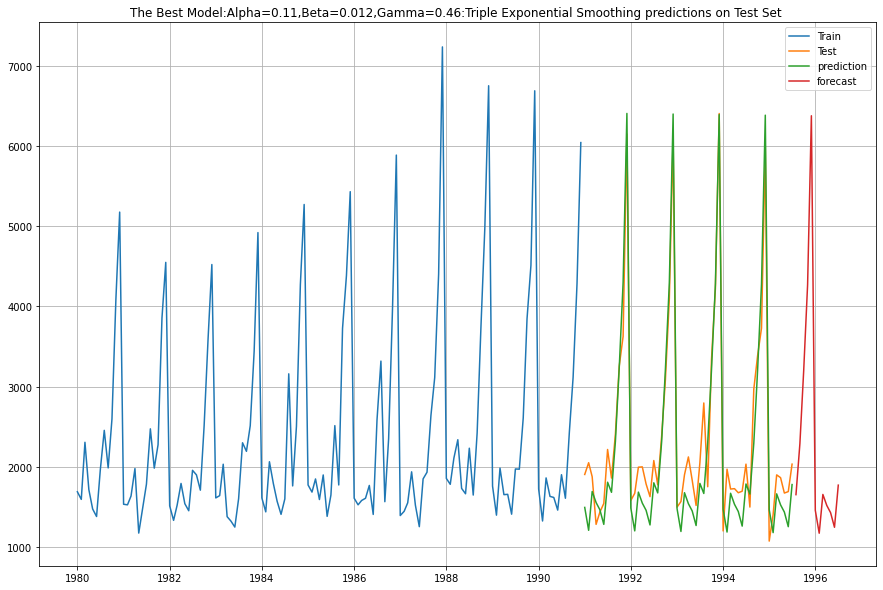

In [157]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='prediction')
plt.plot(future_12_months, label='forecast')

plt.legend(loc='best')
plt.grid()
plt.title('The Best Model:Alpha=0.11,Beta=0.012,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set ');

In [158]:
future_12_months.to_frame().to_csv('12months_forecast',header=False)